In [1]:
# We need to think of a better way to compute the forecasted values - the average

In [2]:
# What happense currently?

# We average out the predicted values before transformation, which is not the best thing to do, we need to first do the transformation - and then average things out, let's try computing the metrics this way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [4]:
# We still need the true counts, so we need the nest few steps, let's leave things as they are

In [5]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0103/forecasted_counts/"

In [6]:
# os.listdir(path_to_dfs)

In [7]:
len(os.listdir(path_to_dfs))

6371

In [8]:
6370/910

7.0

In [9]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [10]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [11]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [12]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [13]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [14]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [15]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [16]:
# ordered_csv_files

In [17]:
# averaged_forecasts_csvs list is pointless at this time?

In [18]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 483 ms, sys: 20.4 ms, total: 503 ms
Wall time: 506 ms


In [19]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [20]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.007279,0.0,0.001342,0.0,-0.014463,0.0,-0.006619,0.000005,-0.006840,...,0.0,-0.009194,0.0,-0.024609,0.0,-0.013291,0.0,0.006175,0.0,0.015136
1,0.0,-0.007449,0.0,-0.004507,0.0,-0.004461,0.0,0.010723,0.064341,0.000068,...,0.0,-0.003731,0.0,-0.000618,0.0,-0.000924,0.0,0.003867,0.0,0.005072
2,0.0,-0.005981,0.0,-0.007174,0.0,-0.000400,0.0,0.004464,0.000000,-0.001827,...,0.0,-0.008060,0.0,-0.010582,0.0,-0.002664,0.0,-0.015471,0.0,-0.003901
3,0.0,-0.005447,0.0,-0.006824,0.0,0.011465,0.0,0.021764,0.000000,0.001272,...,0.0,-0.004274,0.0,0.013196,0.0,0.003368,0.0,-0.002275,0.0,0.011471
4,0.0,-0.006981,0.0,-0.006054,0.0,0.004548,0.0,-0.011085,0.000000,0.002165,...,0.0,-0.001649,0.0,0.007829,0.0,0.003785,0.0,-0.009859,0.0,0.004498


In [21]:
combined_df.shape

(7, 1820)

In [22]:
# get the true values
True_values_df = combined_df[['True_value']]

In [23]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.000005,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.064341,0.087708,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.042056,1.144163e-02,0.0,0.0,0.0,...,0.0,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,2.402785e-05,0.000649,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.0,7.268980e-04,0.003864,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
True_values_df.shape

(7, 910)

In [25]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [26]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,5.458158e-06,0.000668,1.044816e-07,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.645597e-02,0.091669,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000e+00,0.042952,1.150733e-02,0.0,0.0,0.0,...,0.000000,7.683623e-10,0.000005,4.013955e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,2.402814e-05,0.000650,8.526243e-09,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.000000,7.271623e-04,0.003871,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,6.876971e-07,0.022043,5.086000e-04,0.0,0.0,0.0,...,0.000000,2.217396e-03,0.005884,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,...,0.022043,9.133409e-06,0.054010,4.412074e-04,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [28]:
sum_true_values

0    40.000661
1    39.000002
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [29]:
# # get the forecasted values
# Forecasted_values_df = combined_df[['Forecasted_value']]

In [30]:
# Forecasted_values_df.head()

In [31]:
# exp_forecasted = np.exp(Forecasted_values_df)-1

In [32]:
# exp_forecasted

In [33]:
# set the values to 0 if the forecasted count is negative?

In [34]:
# exp_forecasted[exp_forecasted < 0] = 0

In [35]:
# exp_forecasted.head()

In [36]:
# sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [37]:
# sum_forecasted_values

In [38]:
# now what about the predicted values? we have stored these in terms of npy files, let's see how we can figure out to get the predicted values

In [39]:
all_forecasts_npy_files = []
for file in os.listdir(path_to_dfs):
    if file[:13] == 'all_forecasts':
        all_forecasts_npy_files.append(file)

In [40]:
len(all_forecasts_npy_files)

910

In [41]:
all_forecasts_npy_files[0]

'all_forecasts_sub_273.npy'

In [42]:
sub_273_forecasts = np.load(os.path.join(path_to_dfs, all_forecasts_npy_files[0]))

In [43]:
sub_273_forecasts.shape

(1000, 4, 7)

In [44]:
# Okay, we have the values for the 7 test periods corresponding to the subwindow 273

In [45]:
# we need to first transform the values?

In [46]:
sub_273_forecasts = np.exp(sub_273_forecasts) - 1

In [47]:
sub_273_forecasts.min(), sub_273_forecasts.max()

(-0.5362193, 1.1823566)

In [48]:
# get rid of anything below zero?
sub_273_forecasts[sub_273_forecasts < 0] = 0

In [49]:
# sub_273_forecasts

In [50]:
# We can now take the average?

In [51]:
sub_273_forecasts_averged = np.mean(sub_273_forecasts, axis = (0,1))

In [52]:
sub_273_forecasts_averged.shape

(7,)

In [53]:
sub_273_forecasts_averged

array([0.10054662, 0.12443037, 0.11572273, 0.08740085, 0.08766311,
       0.08644702, 0.07760028], dtype=float32)

In [54]:
0.08*910

72.8

In [55]:
sub_273_forecasts.shape

(1000, 4, 7)

In [56]:
# sanity check
for i in range(sub_273_forecasts.shape[-1]):
    track = sub_273_forecasts[:,:,i]
    print(np.mean(track))

0.10054664
0.12443044
0.115722805
0.08740079
0.08766315
0.08644705
0.07760044


In [57]:
# Okay, this is what we need, but what do we need at the end? we need this to happen to all the 910 subwindows and get the means - collect these in a list first?

In [58]:
# all_forecasts_sub_273

In [59]:
%%time
catch_all_averaged_preds = []
for i in range(910):
    file_name = "all_forecasts_sub_" + str(i) + '.npy'
    al_forecasts_npy_file = np.load(os.path.join(path_to_dfs, file_name))
    # make the conversion
    sub_window_forecasts = np.exp(al_forecasts_npy_file) - 1
    # get rid of anything below zero?
    sub_window_forecasts[sub_window_forecasts < 0] = 0
    # get averages over time 
    sub_window_forecasts_averaged = np.mean(sub_window_forecasts, axis = (0,1))
    catch_all_averaged_preds.append(sub_window_forecasts_averaged)    

CPU times: user 248 ms, sys: 37.5 ms, total: 285 ms
Wall time: 286 ms


In [60]:
len(catch_all_averaged_preds)

910

In [61]:
catch_all_averaged_preds[0]

array([0.00561321, 0.00324905, 0.00353376, 0.00202595, 0.00172032,
       0.00170805, 0.00144195], dtype=float32)

In [62]:
# make this a dataframe

In [63]:
Forecasted_values_df = pd.DataFrame(catch_all_averaged_preds).T

In [64]:
Forecasted_values_df.shape

(7, 910)

In [65]:
sum_forecasted_values = Forecasted_values_df.sum(axis = 1)

In [66]:
sum_forecasted_values

0    52.350361
1    47.329994
2    47.863556
3    64.053749
4    49.794975
5    52.801857
6    69.702194
dtype: float32

In [67]:
# These results are absurd, let's stick to what we had done before, we can justify that, this is what we did for comps as well

In [68]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [69]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [70]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000661,52.350361
1,39.000002,47.329994
2,41.000000,47.863556
3,31.000000,64.053749
4,32.000000,49.794975
5,40.002086,52.801857
6,27.000176,69.702194


In [71]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

22.88330723885085

In [72]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

19.127680363654502

In [73]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.8127471189677765, pvalue=0.026272916981235392)

In [74]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-18.554753426978593

##### Coverages and widths for the forecasted values?

In [75]:
# for this we need the all_forecasts npy files

In [76]:
# content location is the same path as above

In [77]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [78]:
# all_forecasts_npy_files

In [79]:
# load the npy files

In [80]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.mean(np.exp(load_file)-1, axis = 1)
    loaded_npy_files.append(mean_file)

CPU times: user 230 ms, sys: 67.3 ms, total: 298 ms
Wall time: 299 ms


In [81]:
len(loaded_npy_files)

910

In [82]:
loaded_npy_files[0].shape

(1000, 7)

In [83]:
loaded_npy_files[0]

array([[-0.00180998, -0.00196771, -0.00340606, ..., -0.00720367,
        -0.00185739, -0.00234137],
       [ 0.00032869, -0.00376967, -0.00256082, ..., -0.00589304,
        -0.00348331, -0.00409266],
       [ 0.00048564, -0.00418378, -0.00465152, ..., -0.00564946,
        -0.00273381, -0.00487228],
       ...,
       [-0.00057434, -0.00323619, -0.00532782, ...,  0.00094108,
         0.00110906,  0.00125468],
       [-0.0001505 , -0.00526524, -0.00317463, ..., -0.00181271,
        -0.00074242,  0.00035597],
       [ 0.00290553, -0.00246418, -0.00259799, ..., -0.00024001,
         0.00217159,  0.00121593]], dtype=float32)

In [84]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.1 ms, sys: 63 µs, total: 20.2 ms
Wall time: 19.5 ms


In [85]:
loaded_npy_files[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00032869, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00048564, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00094108, 0.00110906,
        0.00125468],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00035597],
       [0.00290553, 0.        , 0.        , ..., 0.        , 0.00217159,
        0.00121593]], dtype=float32)

In [86]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [87]:
output.shape

(1000, 7)

In [88]:
output

array([[ 46.677265,  41.563404,  45.508377, ...,  40.561317,  42.376198,
         45.48198 ],
       [ 38.58794 ,  37.42315 ,  39.585705, ...,  33.65631 ,  38.80296 ,
         49.26805 ],
       [ 59.105217,  44.83703 ,  43.029713, ...,  80.921364,  74.14178 ,
        242.4143  ],
       ...,
       [ 33.99256 ,  36.450554,  41.51343 , ...,  44.646847,  46.95957 ,
         54.95598 ],
       [ 51.069294,  37.98074 ,  47.159004, ...,  58.17657 ,  59.668167,
        122.57335 ],
       [ 38.35679 ,  42.147327,  50.050007, ...,  51.489716,  52.483604,
         73.76285 ]], dtype=float32)

In [89]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [90]:
output_alt.shape

(1000, 7)

In [91]:
output_alt

array([[ 46.677265,  41.563404,  45.508377, ...,  40.561317,  42.376198,
         45.48198 ],
       [ 38.58794 ,  37.42315 ,  39.585705, ...,  33.65631 ,  38.80296 ,
         49.26805 ],
       [ 59.105217,  44.83703 ,  43.029713, ...,  80.921364,  74.14178 ,
        242.4143  ],
       ...,
       [ 33.99256 ,  36.450554,  41.51343 , ...,  44.646847,  46.95957 ,
         54.95598 ],
       [ 51.069294,  37.98074 ,  47.159004, ...,  58.17657 ,  59.668167,
        122.57335 ],
       [ 38.35679 ,  42.147327,  50.050007, ...,  51.489716,  52.483604,
         73.76285 ]], dtype=float32)

In [92]:
np.mean(output_alt == output)

1.0

In [93]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [94]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [95]:
li_train

array([[27.36706977],
       [25.89106421],
       [26.15948305],
       [27.39063892],
       [23.72593069],
       [27.5519824 ],
       [27.16596894]])

In [96]:
ui_train

array([[ 57.17884102],
       [ 48.42137804],
       [ 51.90847464],
       [143.12996101],
       [ 66.51004753],
       [ 65.42559986],
       [167.13978233]])

In [97]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [98]:
avg_width_train

59.208849491391824

In [99]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [100]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [101]:
coverage_train

0.8571428571428571

In [102]:
y_traina

array([[40.00066073],
       [39.0000016 ],
       [41.00000005],
       [30.99999992],
       [31.99999951],
       [40.00208609],
       [27.00017611]])

In [103]:
np.mean(output, axis = 0)

array([39.517616, 36.39965 , 37.87    , 51.6967  , 38.057068, 41.317173,
       57.40815 ], dtype=float32)

In [104]:
sum_forecasted_values

0    52.350361
1    47.329994
2    47.863556
3    64.053749
4    49.794975
5    52.801857
6    69.702194
dtype: float32

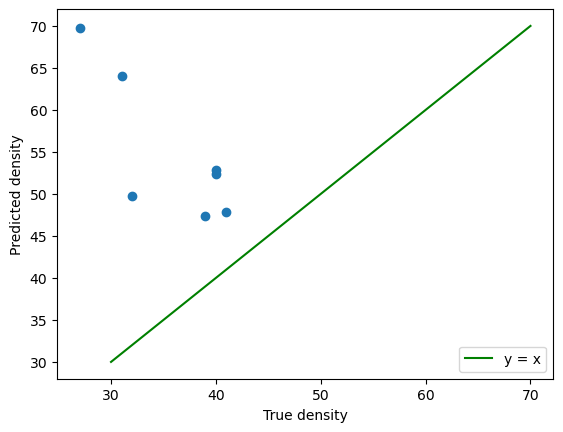

In [109]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([30, 70], [30, 70], color='green', label='y = x')
plt.legend()
plt.show()

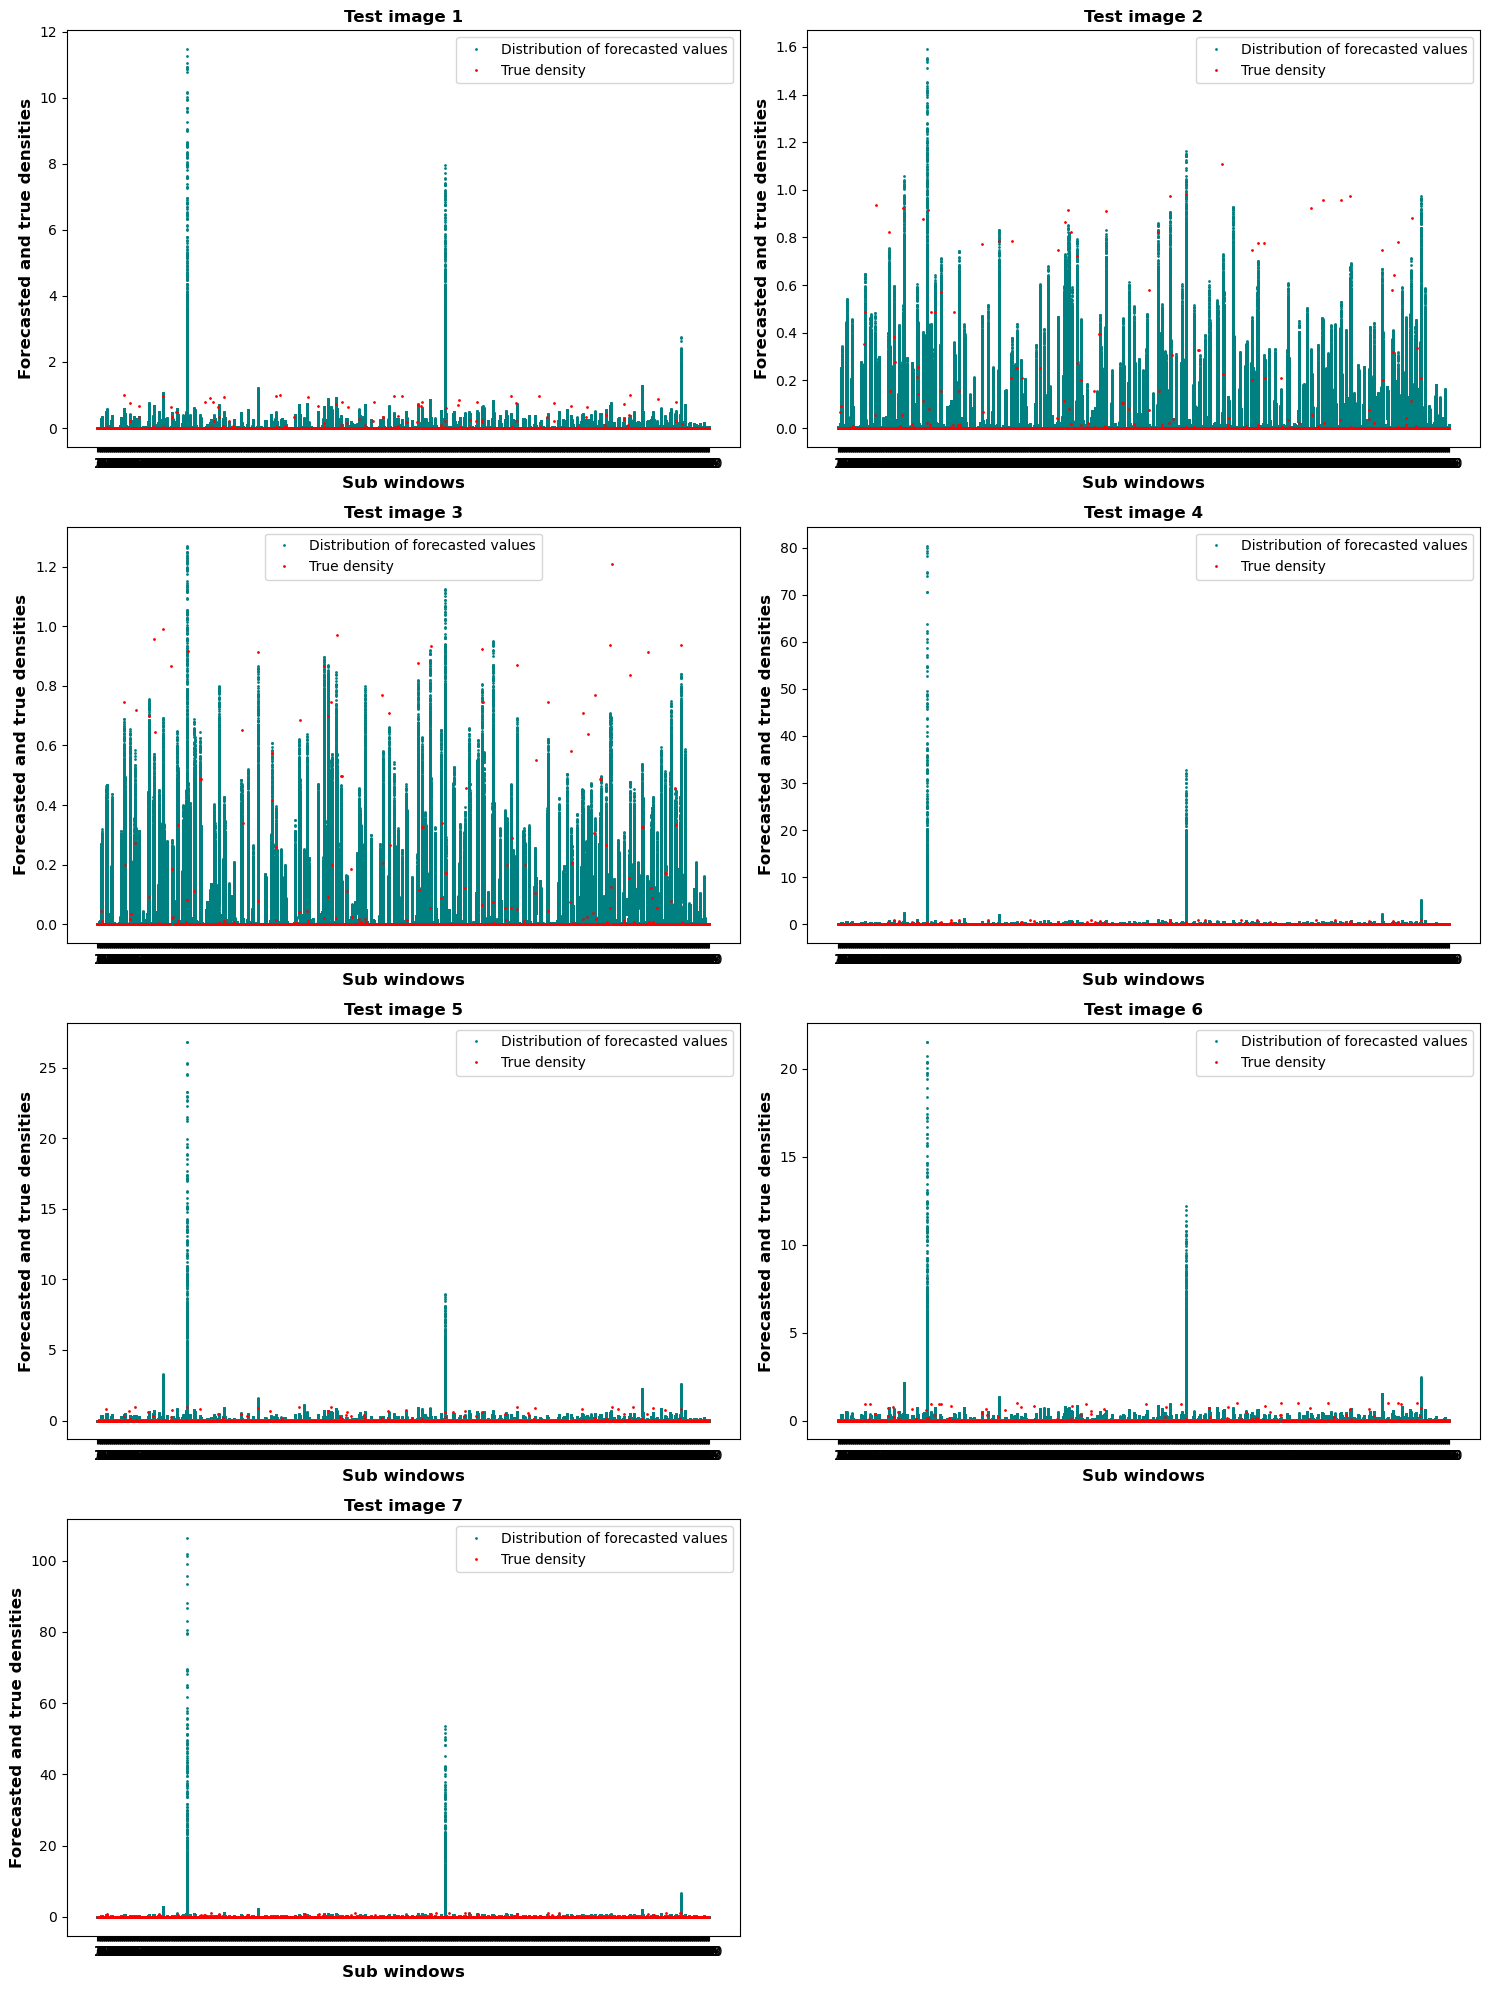

CPU times: user 26.6 s, sys: 754 ms, total: 27.4 s
Wall time: 27 s


In [106]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [107]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots